# Regressão Polinomial

**Etapas:**
- Carregar dados
- Realizar EDA
- Preparar dataset (validação cruzada)
- Treinar modelo
- Validar Modelo
	- Métricas
	- Overfitting
	- Análise de resíduos
- Salvar modelo
- Expor modelo API

**Instalação:** `pipenv install scikit-learn pinguoin==0.5.5 scipy matplotlib seaborn ipykernel fastapi pydantic streamlit uvicorn requests -d --skip-lock --python 3.9 && pipenv lock` 

**Rodar API:** `uvicorn api_model_salary:app --reload`

**Rodar APP:** `streamlit run app_streamlit_salary.py`

## Importações

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregar o dataset
df_salary = pd.read_csv('./dataset/dataset_salario.csv')

## EDA

### Preparação dos datasets

In [3]:
# Inspecionar estruta do dataset
df_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tempo_na_empresa  1000 non-null   int64  
 1   nivel_na_empresa  1000 non-null   int64  
 2   salario_em_reais  1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [4]:
# Inspecionar 10 primeiras linhas do dataset
df_salary.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
0,50,1,2288.13
1,49,4,2389.84
2,39,10,2158.73
3,51,1,2341.06
4,62,7,3584.20
5,105,10,12102.18
6,80,3,5723.35
7,85,2,6424.92
8,66,5,3916.18
9,73,5,4751.79


In [5]:
# Copiar DF para EDA
df_salary_eda = df_salary.copy()

In [6]:
# Copiar DF para Bucketing
df_salary_bucketing = df_salary.copy()

In [7]:
# Detectar valores ausentes
df_salary_eda.isna().sum()

tempo_na_empresa    0
nivel_na_empresa    0
salario_em_reais    0
dtype: int64

### Métricas

In [8]:
# Extrair medidas estatística do DF
df_salary_eda.describe()

,tempo_na_empresa,nivel_na_empresa,salario_em_reais
count,1000.000000,1000.000000,1000.000000
mean,59.712000,5.467000,5093.726110
std,34.027679,2.889509,4536.168857
min,1.000000,1.000000,538.560000
25%,30.750000,3.000000,1537.477500
50%,60.000000,6.000000,3237.920000
75%,89.000000,8.000000,7436.680000
max,120.000000,10.000000,18923.230000


### Outliers

<Axes: xlabel='tempo_na_empresa'>

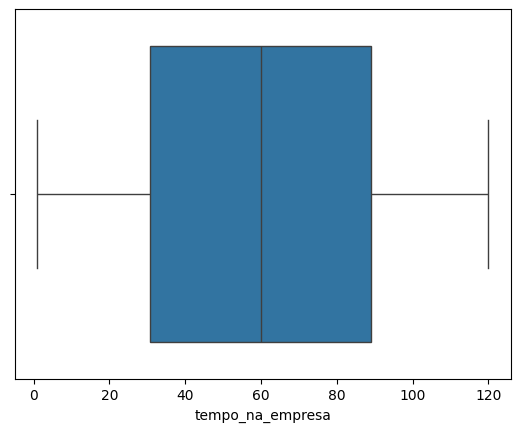

In [9]:
# Verificar outliers - Tempo na empresa
sns.boxplot(data=df_salary_eda, x='tempo_na_empresa')

<Axes: xlabel='nivel_na_empresa'>

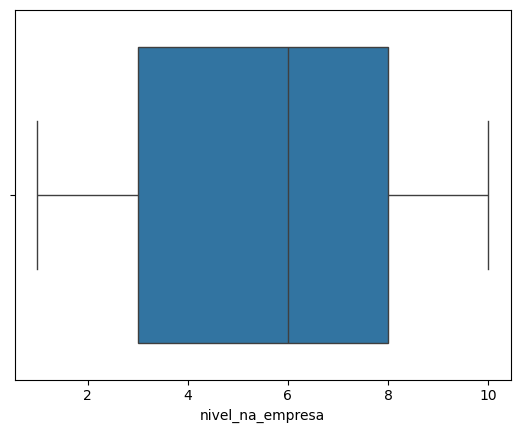

In [10]:
# Verificar outliers - Nível na empresa
sns.boxplot(data=df_salary_eda, x='nivel_na_empresa')

<Axes: xlabel='salario_em_reais'>

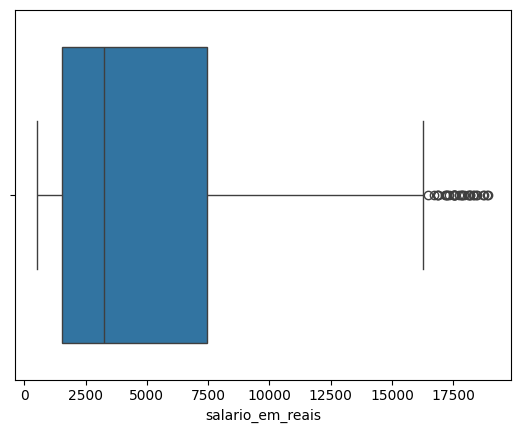

In [11]:
# Verificar outliers - Salário
sns.boxplot(data=df_salary_eda, x='salario_em_reais')

A váriavel salário possui outliers acima, porém são valores esperados para o conjunto de dados

### Histograma

<Axes: xlabel='tempo_na_empresa', ylabel='salario_em_reais'>

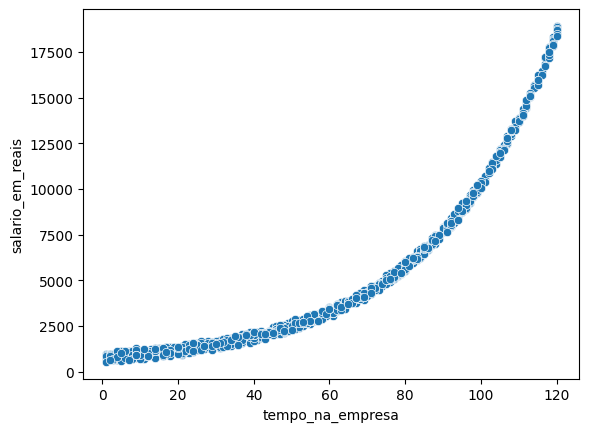

In [12]:
# Cruzamento variáveis numéricas com salário em reais (variável dependente) - Tempo na empresa
sns.scatterplot(data=df_salary_eda, x='tempo_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='salario_em_reais'>

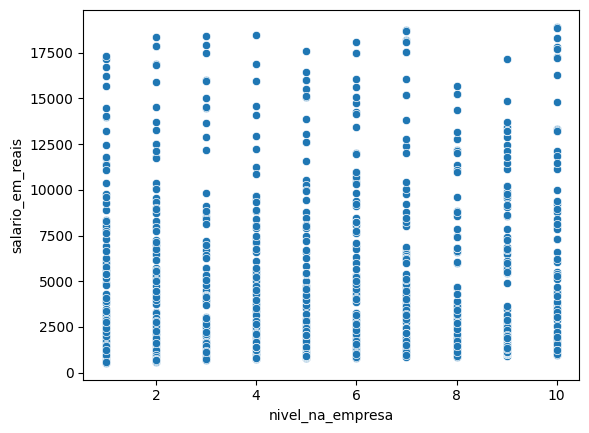

In [13]:
# Cruzamento variáveis numéricas com salário em reais (variável dependente) - Nivel na empresa
sns.scatterplot(data=df_salary_eda, x='nivel_na_empresa', y='salario_em_reais')

<Axes: xlabel='nivel_na_empresa', ylabel='tempo_na_empresa'>

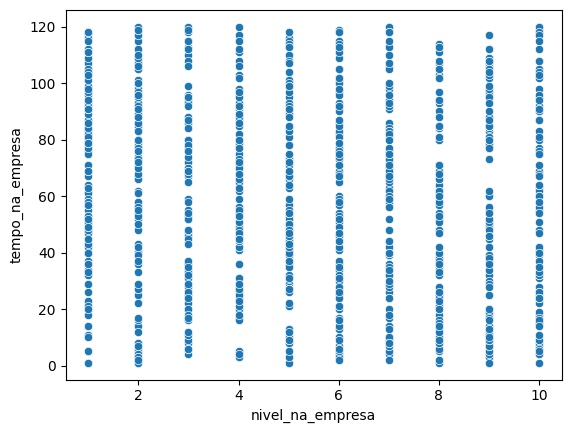

In [14]:
# Cruzamento entre as variáveis numéricas
sns.scatterplot(data=df_salary_eda, x='nivel_na_empresa', y='tempo_na_empresa')

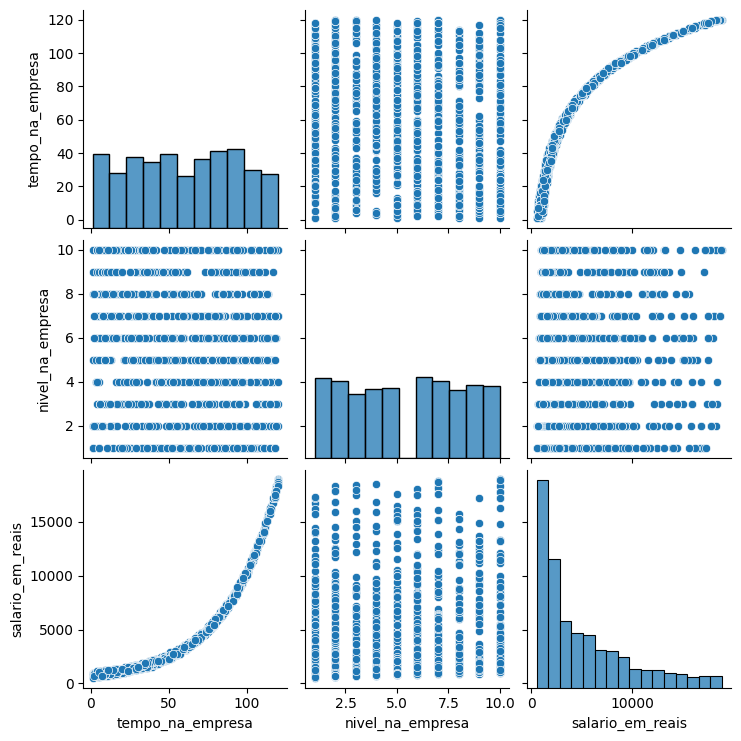

In [15]:
# Histograma das variáveis
sns.pairplot(data=df_salary_eda, vars=['tempo_na_empresa', 'nivel_na_empresa', 'salario_em_reais'])

### Correlação

<Axes: >

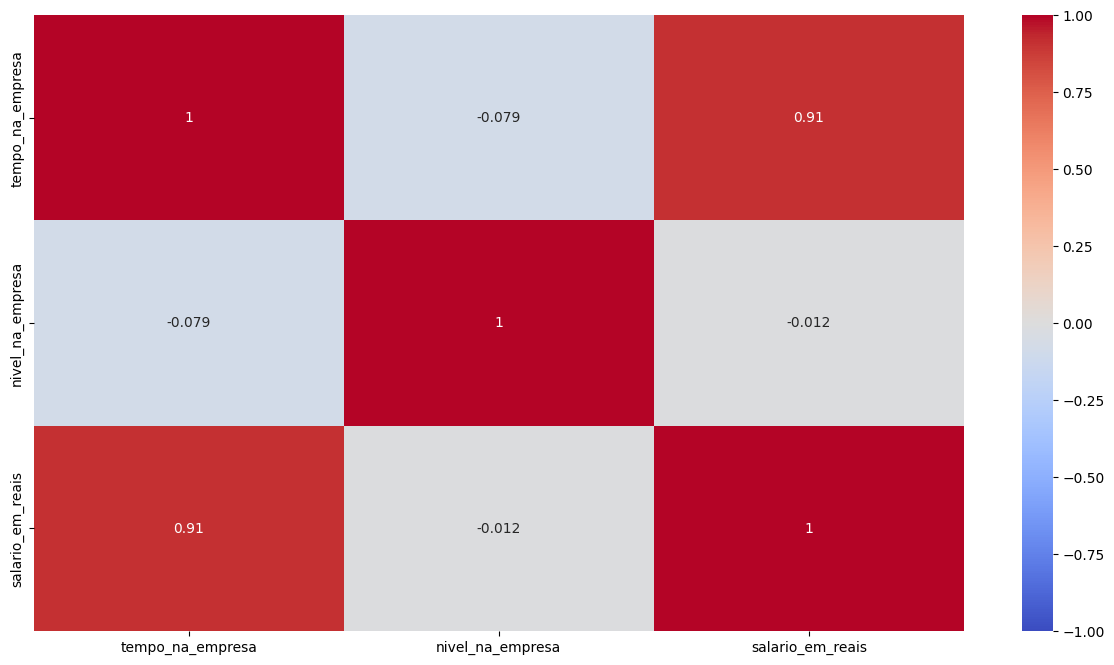

In [16]:
# Mapa de calor - Pearson
plt.figure(figsize=(15, 8))
sns.heatmap(df_salary_eda.corr(method='pearson'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

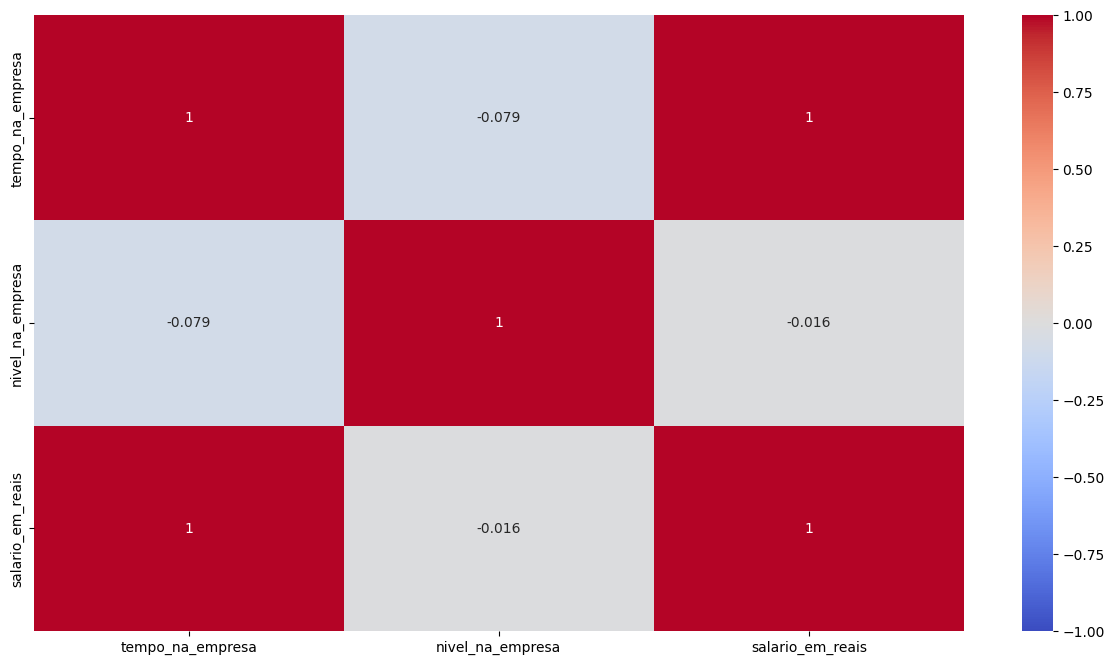

In [17]:
# Mapa de calor - Spearman
plt.figure(figsize=(15, 8))
sns.heatmap(df_salary_eda.corr(method='spearman'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

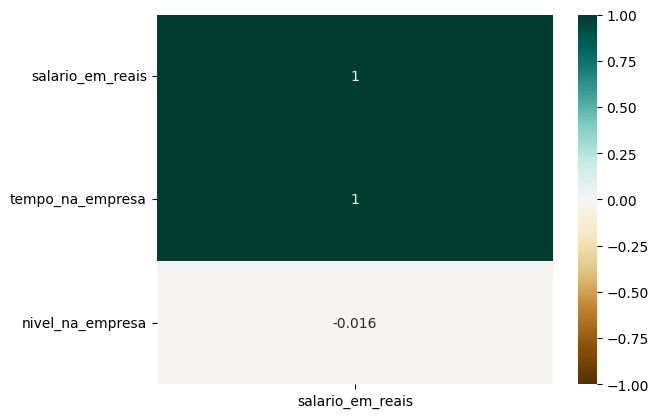

In [18]:
# Formato de ranking
sns.heatmap(
  df_salary_eda.corr(method='spearman')[['salario_em_reais']].sort_values(by='salario_em_reais', ascending=False),
  annot=True,
  cmap='BrBG',
  vmin=-1,
  vmax=1,
)

### Bucketing

In [19]:
# Agrupar df por tempo na empresa
bins_tempo_casa = [0, 10,20,30,40,50,60,70,80,90,100,110,120, 130]
labels_tempo_casa = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120', '120-130']
df_salary_bucketing['escala_tempo'] = pd.cut(
  x=df_salary_bucketing['tempo_na_empresa'],
  bins=bins_tempo_casa,
  labels=labels_tempo_casa,
  include_lowest=True,
)

In [20]:
df_salary_bucketing.head(10)

,tempo_na_empresa,nivel_na_empresa,salario_em_reais,escala_tempo
0,50,1,2288.13,40-50
1,49,4,2389.84,40-50
2,39,10,2158.73,30-40
3,51,1,2341.06,50-60
4,62,7,3584.20,60-70
5,105,10,12102.18,100-110
6,80,3,5723.35,70-80
7,85,2,6424.92,80-90
8,66,5,3916.18,60-70
9,73,5,4751.79,70-80


<Axes: xlabel='escala_tempo', ylabel='salario_em_reais'>

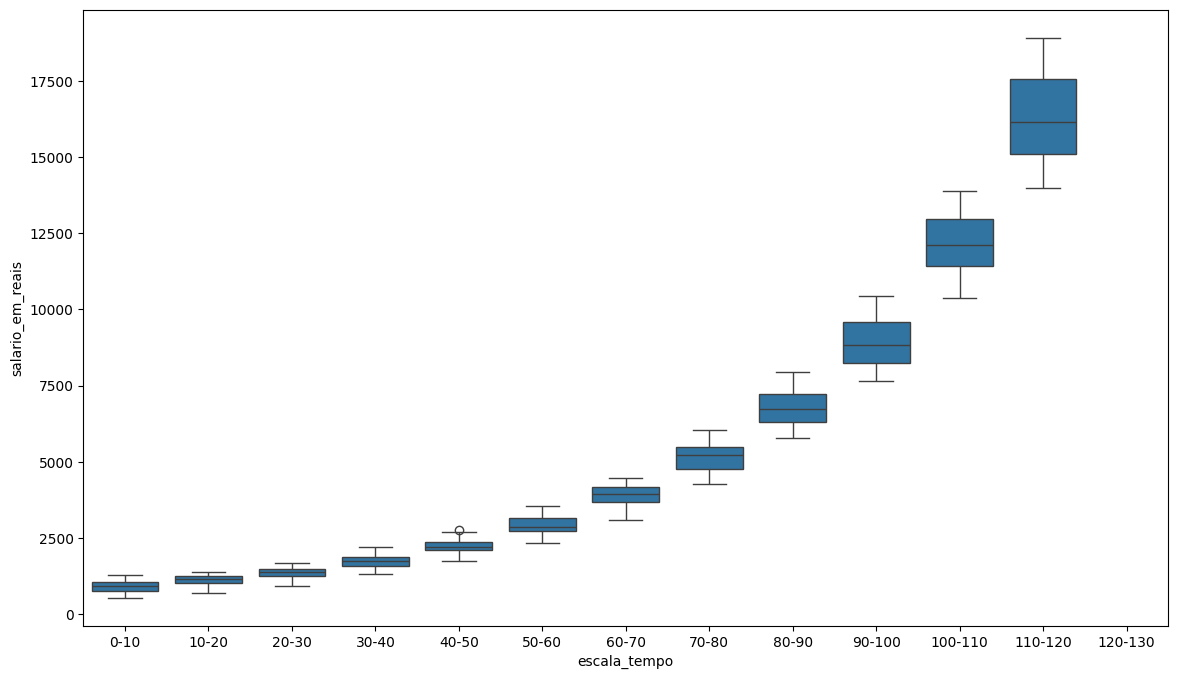

In [21]:
# Analisar a distribuição dos salários por escala de tempo na empresa
plt.figure(figsize=(14, 8))
sns.boxplot(df_salary_bucketing, x='escala_tempo', y='salario_em_reais')

## Treinamento do modelo - Linear

### Divisão dos dados com KFold

In [22]:
# importar bibliotecas
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, root_mean_squared_error

import numpy as np

In [23]:
# Criar dataset de treino e teste
X = df_salary.drop(columns=['salario_em_reais'], axis=1)
y = df_salary['salario_em_reais']

In [24]:
# Split usando KFold com 5 pastas/folds
kf = KFold(n_splits=5, shuffle=True, random_state=51)

### Treinamento do modelo

In [25]:
# Pipeline
# Padronizar variáveis numéricas - tempo_na_empresa e nivel_na_empresa

# Nomes das colunas
colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

# Transformer para colunas numéricas
transformer_numericas = Pipeline(steps=[
  ('scaler', StandardScaler()),
])

# Criar Column Transformer
preprocessor = ColumnTransformer(
	transformers=[
		('num', transformer_numericas, colunas_numericas),
	]
)

# Criar pipeline principal - Pré-processador + Modelo
model_regr = Pipeline([
  ('preprocessor', preprocessor),
	('regressor', LinearRegression()),
])

In [26]:
# Armazenar RMSE Treino e Teste
rmse_scores_fold_train = []
rmse_scores_fold_test = []

# Armazenar R2 Score de Teste
r2_scores_fold_test = []

# Armazenar resíduos
residuos = []

# Armazenar predições
y_pred_total = []

In [27]:
# Treinar o modelo com KFolds
for train_index, test_index in kf.split(X):
	# Dividir o dataset em treino e teste
	X_train, X_test = X.iloc[train_index], X.iloc[test_index]
	y_train, y_test = y.iloc[train_index], y.iloc[test_index]

	# Treinar o modelo
	model_regr.fit(X_train, y_train)

	# Fazer previsões no conjunto de treinamento e teste
	y_train_pred = model_regr.predict(X_train)
	y_test_pred = model_regr.predict(X_test)

	# Calcular RMSE para treinamento e teste
	rmse_train = root_mean_squared_error(y_train, y_train_pred)
	rmse_test = root_mean_squared_error(y_test, y_test_pred)

	# Calcular R2 Score para teste
	r2_score_test = r2_score(y_test, y_test_pred)

	# Calcular resíduos para teste
	residuos_test = np.array(y_test - y_test_pred)

	# Armazenar dados
	rmse_scores_fold_train.append(rmse_train)
	rmse_scores_fold_test.append(rmse_test)
	r2_scores_fold_test.append(r2_score_test)
	residuos.append(residuos_test)
	y_pred_total.append(y_test_pred)

### Métricas do modelo

In [28]:
rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)
r2_score_test_final = np.mean(r2_scores_fold_test)

percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100

residuos = np.array(residuos).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1)

In [29]:
print(f'RMSE (Treino): {rmse_train_final}')
print(f'RMSE (Teste): {rmse_test_final}')
print(f'Percentual de Diferença entre RMSE (Teste) e RMSE (Treino): {percentual_rmse_final}%')
print(f'R2 Score (Teste): {r2_score_test_final}')

RMSE (Treino): 1882.8318426651392
RMSE (Teste): 1886.4504221336076
Percentual de Diferença entre RMSE (Teste) e RMSE (Treino): 0.19218813844503052%
R2 Score (Teste): 0.8261178870584762


### Análise de resíduos

In [30]:
# Transformar resíduos em uma escala padrão
from scipy.stats import zscore
residuos_std = zscore(residuos)

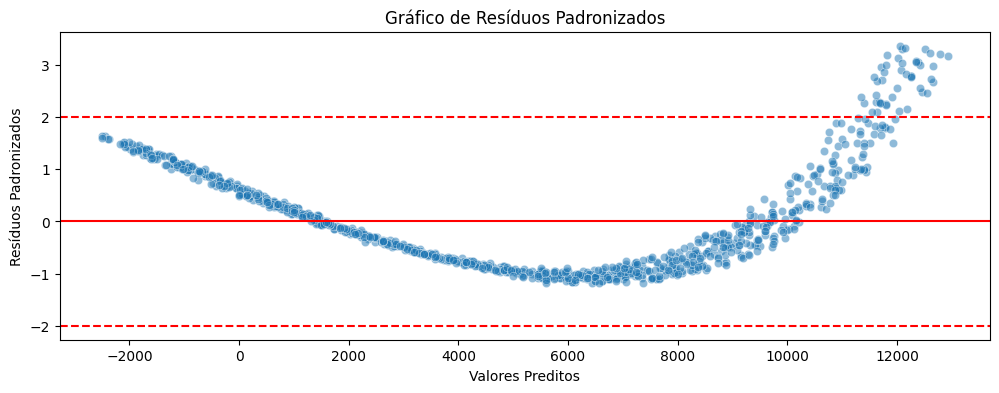

In [31]:
# Plotar gráfico de resíduos
# Valores entre -2 e 2 são considerados normais
# Verificar homocedasticidade (dispersão constante dos resíduos)
plt.figure(figsize=(12, 4))
sns.scatterplot(x=y_pred_total, y=residuos_std, alpha=0.5)
plt.axhline(0, color='r', linestyle='-')
plt.axhline(2, color='r', linestyle='--')
plt.axhline(-2, color='r', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos Padronizados')
plt.title('Gráfico de Resíduos Padronizados')
plt.show()

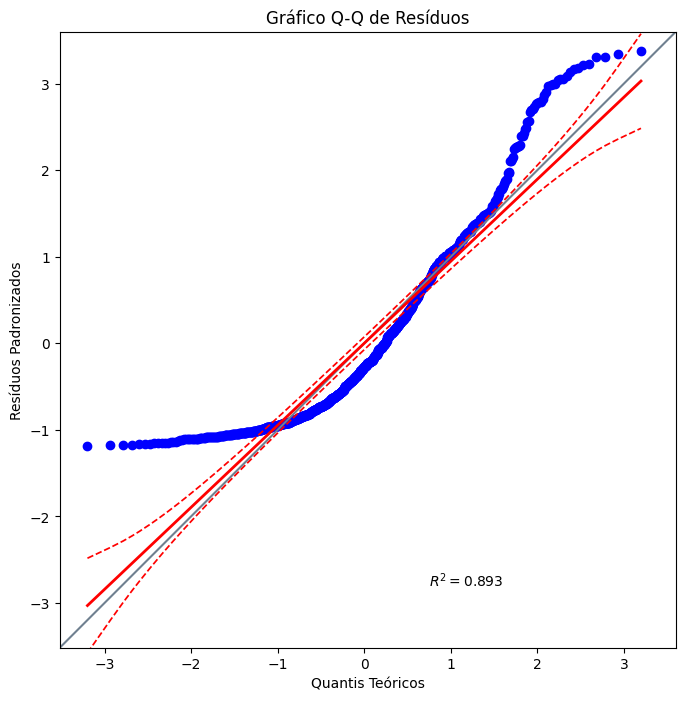

In [32]:
# Checar se resíduos seguem uma distribuição normal
import pingouin as pg
plt.figure(figsize=(14, 8))
pg.qqplot(residuos, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos Padronizados')
plt.title('Gráfico Q-Q de Resíduos')
plt.show()

### Testes estatisticos

In [33]:
# Teste de normalidade - Shapiro-Wilk
from scipy.stats import shapiro, kstest
from statsmodels.stats.diagnostic import lilliefors

# Teste de Shapiro-Wilk
stat_shapiro, p_value_shapiro = shapiro(residuos)
print(f'Teste de Shapiro-Wilk: stat={stat_shapiro}, P-Value={p_value_shapiro}')

Teste de Shapiro-Wilk: stat=0.8919692179652287, P-Value=7.013497918014801e-26


In [34]:
# Teste de normalidade - Kolmogorov-Smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print(f'Teste de Kolmogorov-Smirnov: stat={stat_ks}, P-Value={p_value_ks}')

Teste de Kolmogorov-Smirnov: stat=0.5939999999999955, P-Value=0.0


In [35]:
# Teste de normalidade - Lilliefors
stat_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f'Teste de Lilliefors: stat={stat_ll}, P-Value={p_value_ll}')

Teste de Lilliefors: stat=0.11825983774680093, P-Value=0.0009999999999998899


Todos os testes estatisticos retornaram um valor de P-Value < 0.5, recusando o H0, indicando que o modelo não segue uma distribuição normal

## Treinamento do modelo - Polinomial

### Treinamento do modelo

In [36]:
# exemplo de criação de features polinomiais
# degree=3 para criar features de até grau 3
# include_bias=False para não incluir o termo de bias (intercept)
feat_poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = feat_poly.fit_transform(X)

In [39]:
feat_poly_input = feat_poly.feature_names_in_
print(feat_poly_input)
feat_poly.get_feature_names_out(feat_poly_input)

['tempo_na_empresa' 'nivel_na_empresa']


array(['tempo_na_empresa', 'nivel_na_empresa', 'tempo_na_empresa^2',
       'tempo_na_empresa nivel_na_empresa', 'nivel_na_empresa^2',
       'tempo_na_empresa^3', 'tempo_na_empresa^2 nivel_na_empresa',
       'tempo_na_empresa nivel_na_empresa^2', 'nivel_na_empresa^3'],
      dtype=object)

In [40]:
# Pipeline
# Padronizar variáveis numéricas - tempo_na_empresa e nivel_na_empresa

graus_polynomial = [1,2,3,4,5,6,7,8,9,10]

rmse_train_values = []
rmse_test_values = []
percentual_rmse_values = []
r2_score_test_values = []

# Split usando KFold com 5 pastas/folds
kf_poly = KFold(n_splits=5, shuffle=True, random_state=51)

for grau in graus_polynomial:
	# Nomes das colunas
	colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

	# Transformer para colunas numéricas
	transformer_numericas = Pipeline(steps=[
	  ('scaler', StandardScaler()),
	])

	# Criar Column Transformer
	preprocessor = ColumnTransformer(
		transformers=[
			('num', transformer_numericas, colunas_numericas),
		]
	)

	# Criar features polinomiais
	poly_features = PolynomialFeatures(degree=grau, include_bias=False)

	# Criar pipeline principal - Pré-processador + Modelo
	model_poly = Pipeline([
	  ('preprocessor', preprocessor),
	  ('poly_features', poly_features),
		('regressor', LinearRegression()),
	])

	# Armazenar RMSE Treino e Teste
	rmse_scores_fold_train = []
	rmse_scores_fold_test = []

	# Armazenar R2 Score de Teste
	r2_scores_fold_test = []

	# Armazenar resíduos
	residuos = []

	# Armazenar predições
	y_pred_total = []

	# Treinar o modelo com KFolds
	for train_index, test_index in kf_poly.split(X):
		# Dividir o dataset em treino e teste
		X_train, X_test = X.iloc[train_index], X.iloc[test_index]
		y_train, y_test = y.iloc[train_index], y.iloc[test_index]

		# Treinar o modelo
		model_poly.fit(X_train, y_train)

		# Fazer previsões no conjunto de treinamento e teste
		y_train_pred = model_poly.predict(X_train)
		y_test_pred = model_poly.predict(X_test)

		# Calcular RMSE para treinamento e teste
		rmse_train = root_mean_squared_error(y_train, y_train_pred)
		rmse_test = root_mean_squared_error(y_test, y_test_pred)

		# Calcular R2 Score para teste
		r2_score_test = r2_score(y_test, y_test_pred)

		# Calcular resíduos para teste
		residuos_test = np.array(y_test - y_test_pred)

		# Armazenar dados
		rmse_scores_fold_train.append(rmse_train)
		rmse_scores_fold_test.append(rmse_test)
		r2_scores_fold_test.append(r2_score_test)
		residuos.append(residuos_test)
		y_pred_total.append(y_test_pred)

	rmse_train_final = np.mean(rmse_scores_fold_train)
	rmse_test_final = np.mean(rmse_scores_fold_test)
	r2_score_test_final = np.mean(r2_scores_fold_test)

	percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100

	residuos = np.array(residuos).reshape(-1)
	y_pred_total = np.array(y_pred_total).reshape(-1)

	rmse_train_values.append(rmse_train_final)
	rmse_test_values.append(rmse_test_final)
	percentual_rmse_values.append(percentual_rmse_final)
	r2_score_test_values.append(r2_score_test_final)

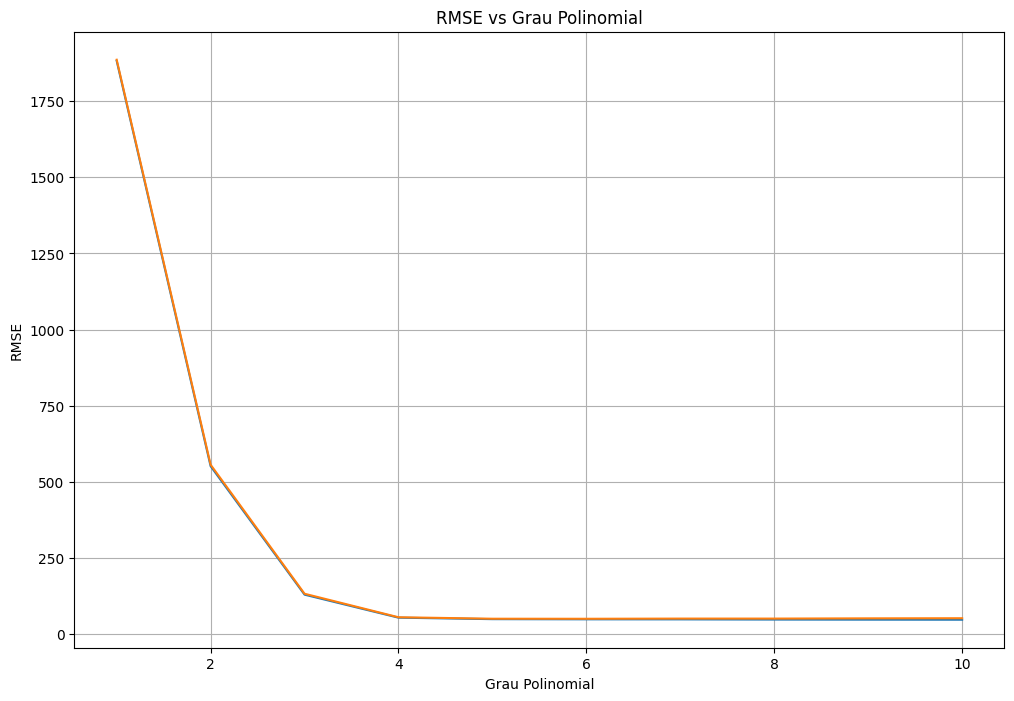

In [41]:
 # Plotar gráfico para comparar RMSE por grau polinomial
plt.figure(figsize=(12, 8))
plt.plot(graus_polynomial, rmse_train_values, label='RMSE (Treino)')
plt.plot(graus_polynomial, rmse_test_values, label='RMSE (Teste)')
plt.xlabel('Grau Polinomial')
plt.ylabel('RMSE')
plt.title('RMSE vs Grau Polinomial')
plt.grid(True)
plt.show()

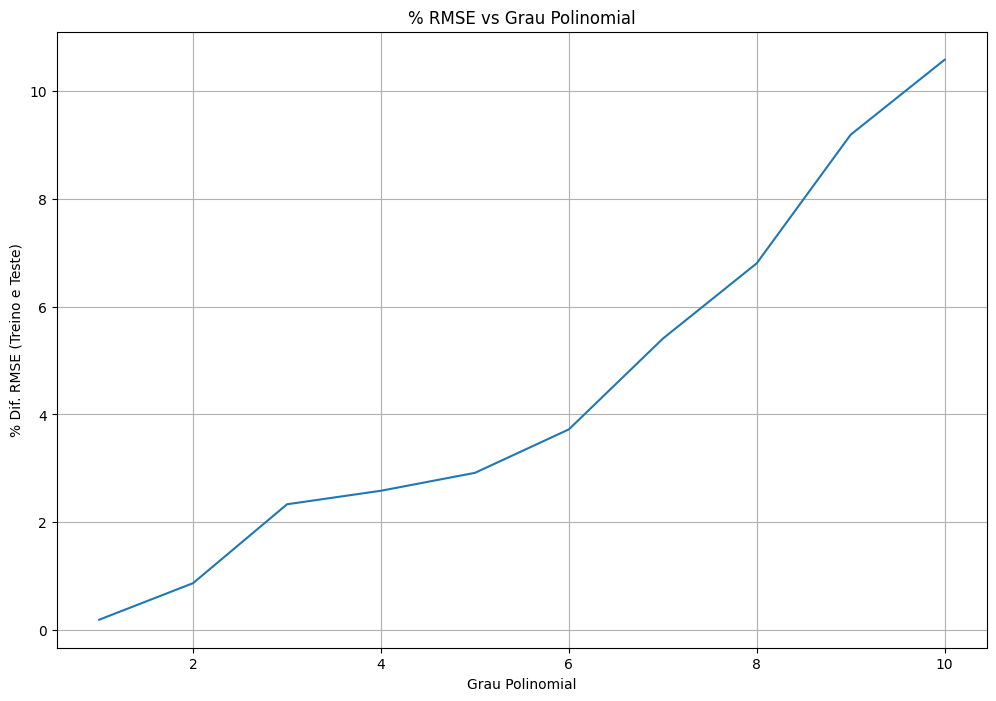

In [42]:
 # Plotar gráfico para comparar Percentual de diferença RMSE (Treino e Teste)
plt.figure(figsize=(12, 8))
plt.plot(graus_polynomial, percentual_rmse_values, label='% Dif. RMSE (Treino e Teste)')
plt.xlabel('Grau Polinomial')
plt.ylabel('% Dif. RMSE (Treino e Teste)')
plt.title('% RMSE vs Grau Polinomial')
plt.grid(True)
plt.show()

Analisando os dois gráficos, o que melhor se encaixa é o polinômio  de grau 4, pois teve uma baixa considerável do nível RMSE do grau anterior (3) e a partir dele se estabilizou. Também pelo gráfico de percentual, podemos notar que houve uma pequena diferenç em relação ao de grau 3, indicando um bom nível de overfitting do modelo

In [43]:
# Pipeline do modelo polinomial final de grau 4
# Padronizar variáveis numéricas - tempo_na_empresa e nivel_na_empresa

# Split usando KFold com 5 pastas/folds
kf_poly = KFold(n_splits=5, shuffle=True, random_state=51)

# Nomes das colunas
colunas_numericas = ['tempo_na_empresa', 'nivel_na_empresa']

# Transformer para colunas numéricas
transformer_numericas = Pipeline(steps=[
  ('scaler', StandardScaler()),
])

# Criar Column Transformer
preprocessor = ColumnTransformer(
	transformers=[
		('num', transformer_numericas, colunas_numericas),
	]
)

# Criar features polinomiais
poly_features = PolynomialFeatures(degree=4, include_bias=False)

# Criar pipeline principal - Pré-processador + Modelo
model_poly = Pipeline([
  ('preprocessor', preprocessor),
  ('poly_features', poly_features),
	('regressor', LinearRegression()),
])

# Armazenar RMSE Treino e Teste
rmse_scores_fold_train = []
rmse_scores_fold_test = []

# Armazenar R2 Score de Teste
r2_scores_fold_test = []

# Armazenar resíduos
residuos = []

# Armazenar predições
y_pred_total = []

# Treinar o modelo com KFolds
for train_index, test_index in kf_poly.split(X):
	# Dividir o dataset em treino e teste
	X_train, X_test = X.iloc[train_index], X.iloc[test_index]
	y_train, y_test = y.iloc[train_index], y.iloc[test_index]

	# Treinar o modelo
	model_poly.fit(X_train, y_train)

	# Fazer previsões no conjunto de treinamento e teste
	y_train_pred = model_poly.predict(X_train)
	y_test_pred = model_poly.predict(X_test)

	# Calcular RMSE para treinamento e teste
	rmse_train = root_mean_squared_error(y_train, y_train_pred)
	rmse_test = root_mean_squared_error(y_test, y_test_pred)

	# Calcular R2 Score para teste
	r2_score_test = r2_score(y_test, y_test_pred)

	# Calcular resíduos para teste
	residuos_test = np.array(y_test - y_test_pred)

	# Armazenar dados
	rmse_scores_fold_train.append(rmse_train)
	rmse_scores_fold_test.append(rmse_test)
	r2_scores_fold_test.append(r2_score_test)
	residuos.append(residuos_test)
	y_pred_total.append(y_test_pred)

rmse_train_final = np.mean(rmse_scores_fold_train)
rmse_test_final = np.mean(rmse_scores_fold_test)
r2_score_test_final = np.mean(r2_scores_fold_test)

percentual_rmse_final = ((rmse_test_final - rmse_train_final) / rmse_train_final) * 100

residuos = np.array(residuos).reshape(-1)
y_pred_total = np.array(y_pred_total).reshape(-1)

### Análise de métricas

In [44]:
print(f'RMSE (Treino): {rmse_train_final}')
print(f'RMSE (Teste): {rmse_test_final}')
print(f'Percentual de Diferença entre RMSE (Teste) e RMSE (Treino): {percentual_rmse_final}%')
print(f'R2 Score (Teste): {r2_score_test_final}')

RMSE (Treino): 53.32698559565159
RMSE (Teste): 54.705043527963326
Percentual de Diferença entre RMSE (Teste) e RMSE (Treino): 2.584166190755218%
R2 Score (Teste): 0.9998524123039415


### Análise de resíduos

In [45]:
# Transformar resíduos em uma escala padrão
residuos_std = zscore(residuos)

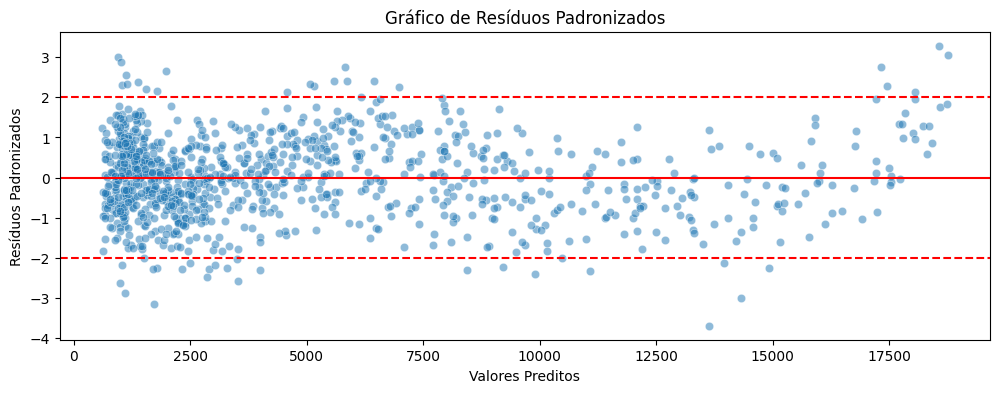

In [46]:
# Plotar gráfico de resíduos
# Valores entre -2 e 2 são considerados normais
# Verificar homocedasticidade (dispersão constante dos resíduos)
plt.figure(figsize=(12, 4))
sns.scatterplot(x=y_pred_total, y=residuos_std, alpha=0.5)
plt.axhline(0, color='r', linestyle='-')
plt.axhline(2, color='r', linestyle='--')
plt.axhline(-2, color='r', linestyle='--')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos Padronizados')
plt.title('Gráfico de Resíduos Padronizados')
plt.show()

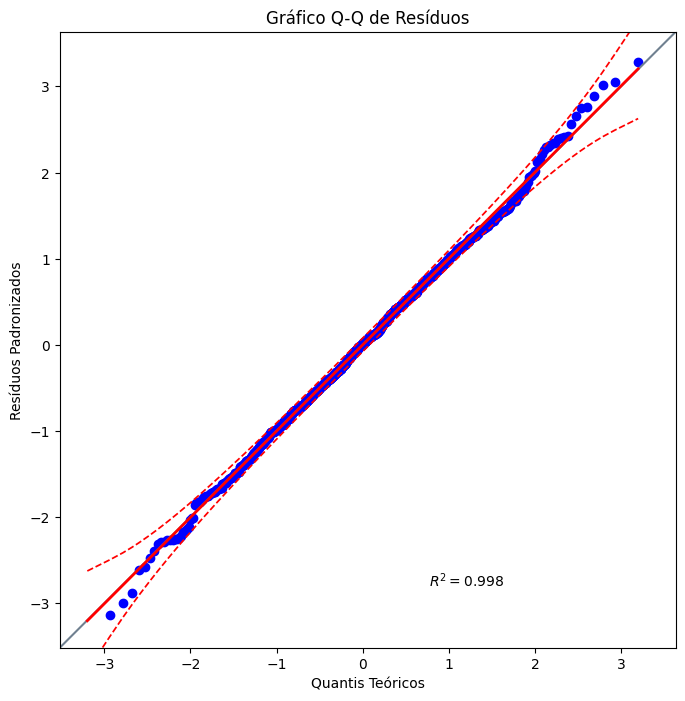

In [47]:
# Checar se resíduos seguem uma distribuição normal
import pingouin as pg
plt.figure(figsize=(14, 8))
pg.qqplot(residuos, dist='norm', confidence=0.95)
plt.xlabel('Quantis Teóricos')
plt.ylabel('Resíduos Padronizados')
plt.title('Gráfico Q-Q de Resíduos')
plt.show()

### Análise estatisticas

In [48]:
# Teste de Shapiro-Wilk
stat_shapiro, p_value_shapiro = shapiro(residuos)
print(f'Teste de Shapiro-Wilk: stat={stat_shapiro}, P-Value={p_value_shapiro}')

Teste de Shapiro-Wilk: stat=0.9986951372205322, P-Value=0.6852797159659264


In [49]:
# Teste de normalidade - Kolmogorov-Smirnov
stat_ks, p_value_ks = kstest(residuos, 'norm')
print(f'Teste de Kolmogorov-Smirnov: stat={stat_ks}, P-Value={p_value_ks}')

Teste de Kolmogorov-Smirnov: stat=0.48237446499530856, P-Value=1.2202460106524528e-214


In [50]:
# Teste de normalidade - Lilliefors
stat_ll, p_value_ll = lilliefors(residuos, dist='norm', pvalmethod='table')
print(f'Teste de Lilliefors: stat={stat_ll}, P-Value={p_value_ll}')

Teste de Lilliefors: stat=0.013637346894999736, P-Value=0.956627002204142


### Realizar predições individuais

In [62]:
input_features = {
  'tempo_na_empresa': 72,
  'nivel_na_empresa': 10
}

pred_df = pd.DataFrame(input_features, index=[1])

model_poly.predict(pred_df)

array([4808.03154228])

In [63]:
# Salvar modelo
import joblib
joblib.dump(model_poly, './model_salary.pkl')

['./model_salary.pkl']